In [1]:
%matplotlib notebook
import numpy as np
from itertools import permutations, product
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D

from scipy.stats import norm as normalDist
import seaborn as sns
sns.set_style("whitegrid")
colors = sns.color_palette("husl",12)

In [183]:
N = 1
wdl = np.linspace(0.,0.9, 40)
wsl = np.linspace(0.,0.9, 40)
a = 0.7#np.repeat(0.7, N)
d = 1.0#np.repeat(0.9, N)


def fp_num(ws_, wd_, a_, d_, max_it = 500):
    r = np.ones_like(a)
    s = np.ones_like(a)
    ni = float(a.shape[0])
    for i in range(max_it):
        r = np.minimum(d_, a_ + np.sum(ws_*s_)/ni+np.sum(wd_*r)/ni)
        s = np.maximum(np.repeat(0., N), a_-d_+np.sum(ws_*s)/ni+np.sum(wd_*r)/ni)
    return np.array([ s+r > d_ ,s ,r, s+r])    
        

def fp_ana(ws_, wd_, a_, d_):
    solv = a_ > (1.-wd_)*d_
    s = (solv*((a_-(1.-wd_)*d_)/(1. - ws_)))
    r = ((1.-solv)*(a_/(1. - wd_)) + solv*d_)
    return np.array([solv, s,r, s+r])

def fp_ana_2(ws_, wd_, a_, d_):
    solv = a_ > (1.-wd_)*d_
    s = (solv*((a_-(1.-wd_)*d_)/(1. - ws_)))
    r = ((1.-solv)*(a_/(1. - wd_)) + solv*d_)
    return s+r

In [184]:
wsr_inp = np.array(list(product(wsl, wdl)))
res = []
for inp in wsr_inp:
    res.append([*inp, *fp_ana(*inp, a, d)])

In [185]:
df = pd.DataFrame(data=res, columns=['ws', 'wd', 'solvent', 's', 'r', 'v'])
X, Y = np.meshgrid(df['ws'].values, df['wd'].values)
Z = fp_ana_2(X,Y,a,d)

<IPython.core.display.Javascript object>


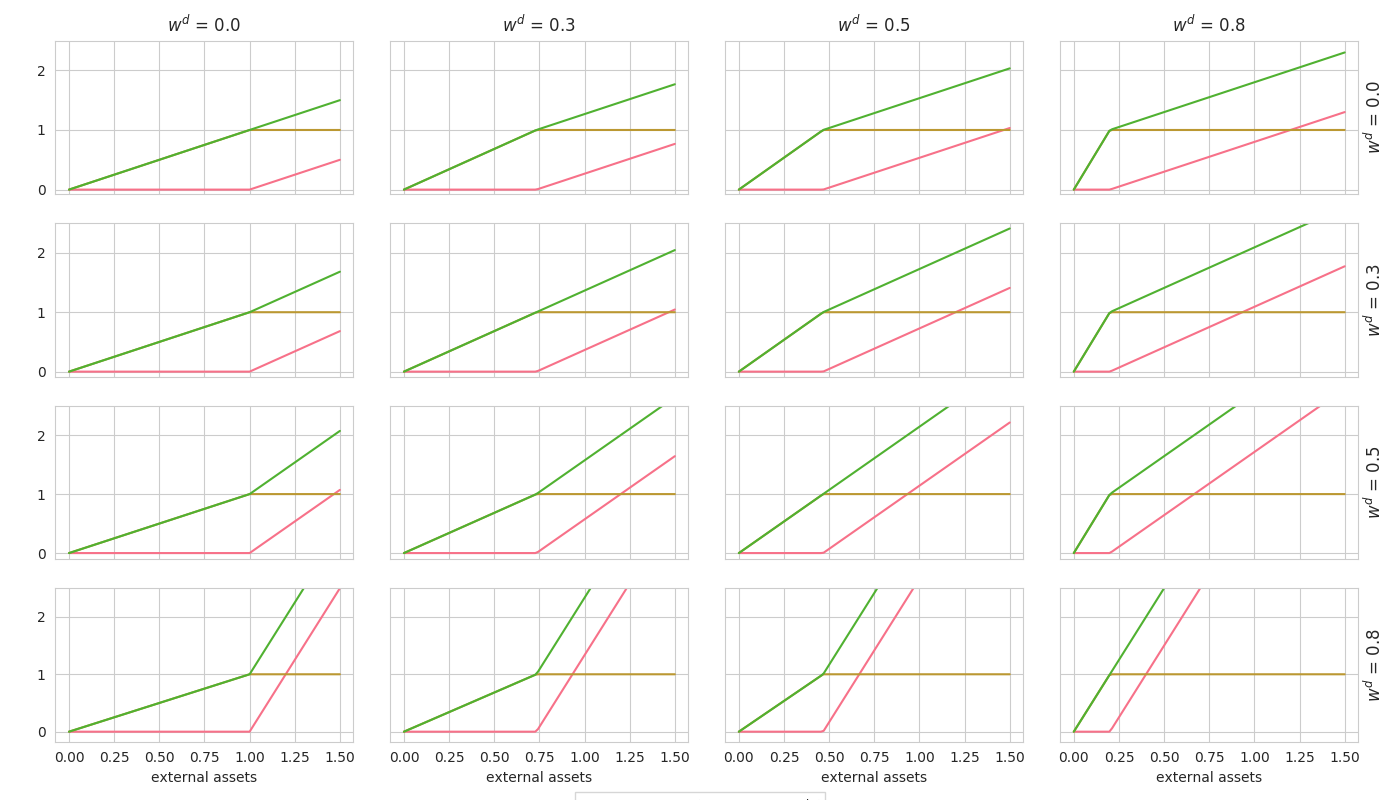

In [187]:
nplots = 4
atl = np.linspace(0.,1.5, 100)
wdl = np.linspace(0.,0.8, nplots)
wsl = np.linspace(0.,0.8, nplots)
d = 1.0

cols = ['$w^d$ = {0:.1f}'.format(col) for col in wdl]
rows = ['$w^d$ = {0:.1f}'.format(col) for col in wsl]




f, axarr = plt.subplots(nplots, nplots, figsize=(14, 8) ,sharex='col', sharey='row')

for ax, col in zip(axarr[0], cols):
    ax.set_title(col)
for ax, col in zip(axarr[-1], cols):
    ax.set_xlabel('external assets')
    
for ax, row in zip(axarr[:,-1], rows):
    ax.set_ylabel(row, rotation=90, size='large')
    ax.yaxis.set_label_position("right")
f.tight_layout()

for i,ws in enumerate(wdl):
    for j,wd in enumerate(wsl):
        #ax = fig.add_subplot(nplots, nplots, i*nplots + j + 1)
        sline = axarr[i,j].plot(atl,np.array(fp_ana(ws, wd, atl, d))[1,:], label="s", color=colors[0])
        rline = axarr[i,j].plot(atl,np.array(fp_ana(ws, wd, atl, d))[2,:], label="r", color=colors[2])
        vline = axarr[i,j].plot(atl,np.array(fp_ana(ws, wd, atl, d))[3,:], label="v", color=colors[4])
        #axarr[i,j].legend()
        axarr[i,j].set_ylim(top=2.5)
        
proxy_lines = [matplotlib.lines.Line2D([], [], color=p) for p in [colors[0], colors[2], colors[4]]]
lgd = f.legend(proxy_lines, ['s', 'r', 'v = s+r'], loc='lower center', fancybox=False, shadow=False, ncol=3,
         bbox_transform=f.transFigure, bbox_to_anchor=(0.5,-0.03))
#f.legend((sline, rline, vline), ('s', 'r', 'v = s+r'))
f.savefig('analytic_model', bbox_extra_artists=(lgd,), bbox_inches="tight")

In [6]:
def st(at, ws, wd, d, r, tau, sigma):
    dp = (np.log(at/((1.0-wd)*d)) + (r + 0.5*sigma*sigma)*tau)/(np.sqrt(tau)*sigma)
    dm = (np.log(at/((1.0-wd)*d)) + (r - 0.5*sigma*sigma)*tau)/(np.sqrt(tau)*sigma)
    return (at*normalDist.cdf(dp) - np.exp(-r*tau)*(1.-wd)*d*normalDist.cdf(dm))/(1.-ws)
    
def rt(at, ws, wd, d, r, tau, sigma):
    dp = (np.log(at/((1.0-wd)*d)) + (r + 0.5*sigma*sigma)*tau)/(np.sqrt(tau)*sigma)
    dm = (np.log(at/((1.0-wd)*d)) + (r - 0.5*sigma*sigma)*tau)/(np.sqrt(tau)*sigma)
    return at*normalDist.cdf(-dp)/(1.-wd) + np.exp(-r*tau)*d*(normalDist.cdf(dm))

<IPython.core.display.Javascript object>


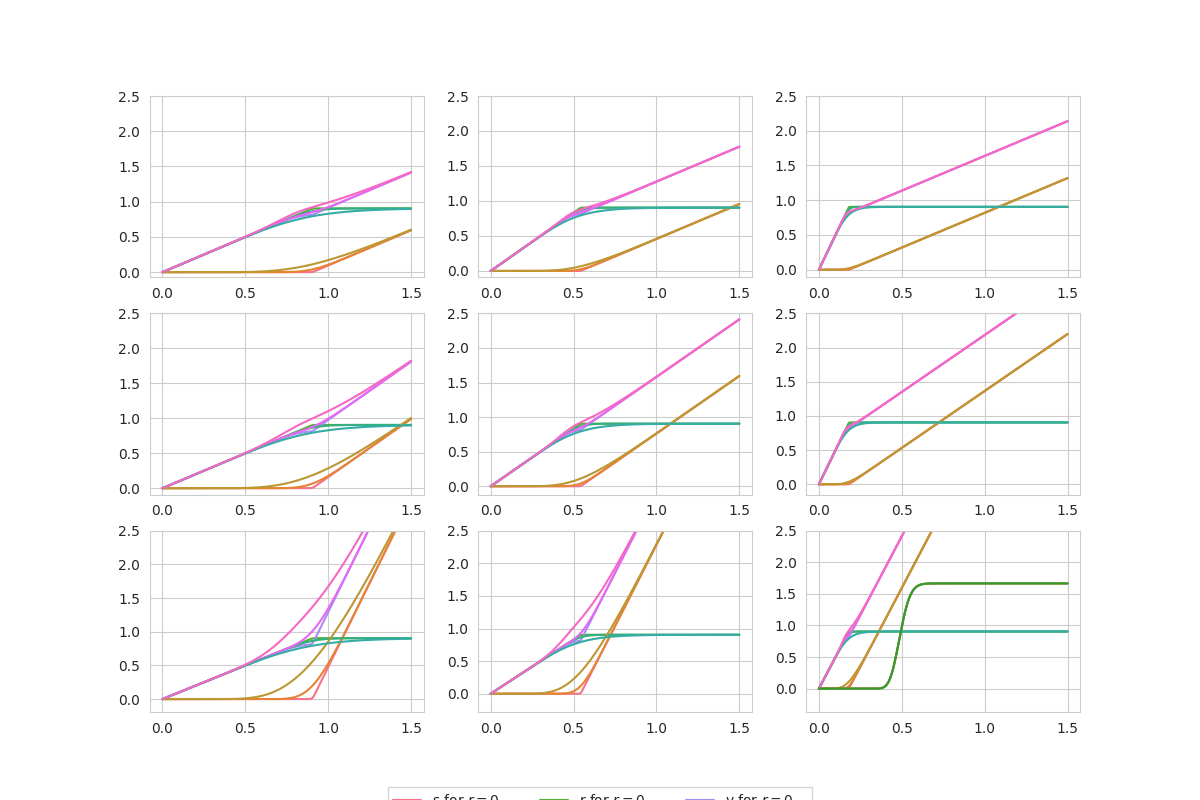

/home/julian/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
/home/julian/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/home/julian/.local/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys
/home/julian/.local/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  


In [33]:
nplots = 3
atl = np.linspace(0.,1.5, 200)
wdl = np.linspace(0.,0.8, nplots)
wsl = np.linspace(0.,0.8, nplots)
d = 1.0
tau = 1.0
sigma = 0.1
r = 0.2

cols = ['$w^d$ = {0:.1f}'.format(col) for col in wdl]
rows = ['$w^s$ = {0:.1f}'.format(col) for col in wsl]

f, axarr = plt.subplots(nplots, nplots, figsize=(12, 8) ,sharex='none', sharey='none')

#for ax, col in zip(axarr[0], cols):
#    ax.set_title(col)
#for ax, col in zip(axarr[-1], cols):
#    ax.set_xlabel('external assets')
#    
#for ax, row in zip(axarr[:,-1], rows):
#    ax.set_ylabel(row, rotation=90, size='large')
#    ax.yaxis.set_label_position("right")
#f.tight_layout()

for i,ws in enumerate(wdl):
    for j,wd in enumerate(wsl):
        #ax = fig.add_subplot(nplots, nplots, i*nplots + j + 1)
        sline = axarr[i,j].plot(atl,st(atl,ws, wd, d, 0.1, tau, 0.01), label="s", color=colors[0])
        rline = axarr[i,j].plot(atl,rt(atl, ws, wd, d, 0.1, tau, 0.01), label="r", color=colors[4])
        vline = axarr[i,j].plot(atl,st(atl, ws, wd, d, 0.1, tau, 0.01) + rt(atl, ws, wd, d, r, tau, sigma), label="v", color=colors[9])
        sline2 = axarr[i,j].plot(atl,st(atl,ws, wd, d, 0.1, tau, 0.11), label="s", color=colors[1])
        rline2 = axarr[i,j].plot(atl,rt(atl, ws, wd, d, 0.1, tau, 0.11), label="r", color=colors[5])
        vline2 = axarr[i,j].plot(atl,st(atl, ws, wd, d, 0.1, tau, 0.11) + rt(atl, ws, wd, d, r, tau, sigma), label="v", color=colors[10])
        sline3 = axarr[i,j].plot(atl,st(atl,ws, wd, d, 0.1, tau, 0.31), label="s", color=colors[2])
        rline3 = axarr[i,j].plot(atl,rt(atl, ws, wd, d, 0.1, tau, 0.31), label="r", color=colors[6])
        vline3 = axarr[i,j].plot(atl,st(atl, ws, wd, d, 0.1, tau, 0.31) + rt(atl, ws, wd, d, r, tau, sigma), label="v", color=colors[11])
        #axarr[i,j].legend()
        axarr[i,j].set_ylim(top=2.5)
        
proxy_lines = [matplotlib.lines.Line2D([], [], color=p) for p in [colors[0], colors[1], colors[2], colors[4], colors[5], colors[6],
                                                                 colors[9], colors[10], colors[11]]]
#lgd = f.legend(proxy_lines, ['s for $\sigma = 0.1$', 's for $\sigma = 0.2$', 's for $\sigma = 0.3$',
#                             'r for $\sigma = 0.1$', 'r for $\sigma = 0.2$', 'r for $\sigma = 0.3$',
#                             'v for $\sigma = 0.1$', 'v for $\sigma = 0.2$', 'v for $\sigma = 0.3$'
#                            ], loc='lower center', fancybox=False, shadow=False, ncol=3,
#         bbox_transform=f.transFigure, bbox_to_anchor=(0.5,-0.08))
lgd = f.legend(proxy_lines, ['s for $r = 0$', 's for $r = 0.1$', 's for $r = 0.2$',
                             'r for $r = 0$', 'r for $r = 0.1$', 'r for $r = 0.2$',
                             'v for $r = 0$', 'v for $r = 0.1$', 'v for $r = 0.2$'
                            ], loc='lower center', fancybox=False, shadow=False, ncol=3,
         bbox_transform=f.transFigure, bbox_to_anchor=(0.5,-0.08))
#f.legend((sline, rline, vline), ('s', 'r', 'v = s+r'))
f.savefig('analytic_model_varr', bbox_extra_artists=(lgd,), bbox_inches="tight")

In [99]:
def greeks(at, ws, wd, d, r, tau, sigma):
    dp = (np.log(at/((1.0-wd)*d)) + (r + 0.5*sigma*sigma)*tau)/(np.sqrt(tau)*sigma)
    dm = (np.log(at/((1.0-wd)*d)) + (r - 0.5*sigma*sigma)*tau)/(np.sqrt(tau)*sigma)
    normDistF = normalDist()
    cdf_p = normDistF.cdf(dp)
    cdf_m = normDistF.cdf(dm)
    cdf_mm = normDistF.cdf(-dm)
    pdf_p =  normDistF.pdf(dp)
    ws_f = 1./(1. - ws)
    wd_f = 1./(1. - wd)
    disc = np.exp(-r*tau)
    
    delta_s = ws_f * cdf_p
    delta_r = wd_f * cdf_mm
    vega_s  =  ws_f * at * np.sqrt(tau) * pdf_p 
    vega_r  = - wd_f * at * np.sqrt(tau) * pdf_p
    theta_s = ws_f * at * sigma * pdf_p / (2.0 * np.sqrt(tau)) + r * d * disc * cdf_m * ws_f / wd_f
    theta_r = - r * d * disc * cdf_m - wd_f* at * sigma * pdf_p / (2.0 * np.sqrt(tau))
    rho_s   = ws_f * d * tau * disc * cdf_m / wd_f
    rho_r   = - d * tau * disc * cdf_m
    return np.array([[delta_s, vega_s, theta_s, rho_s], [delta_r, vega_r, theta_r, rho_r]])

<IPython.core.display.Javascript object>


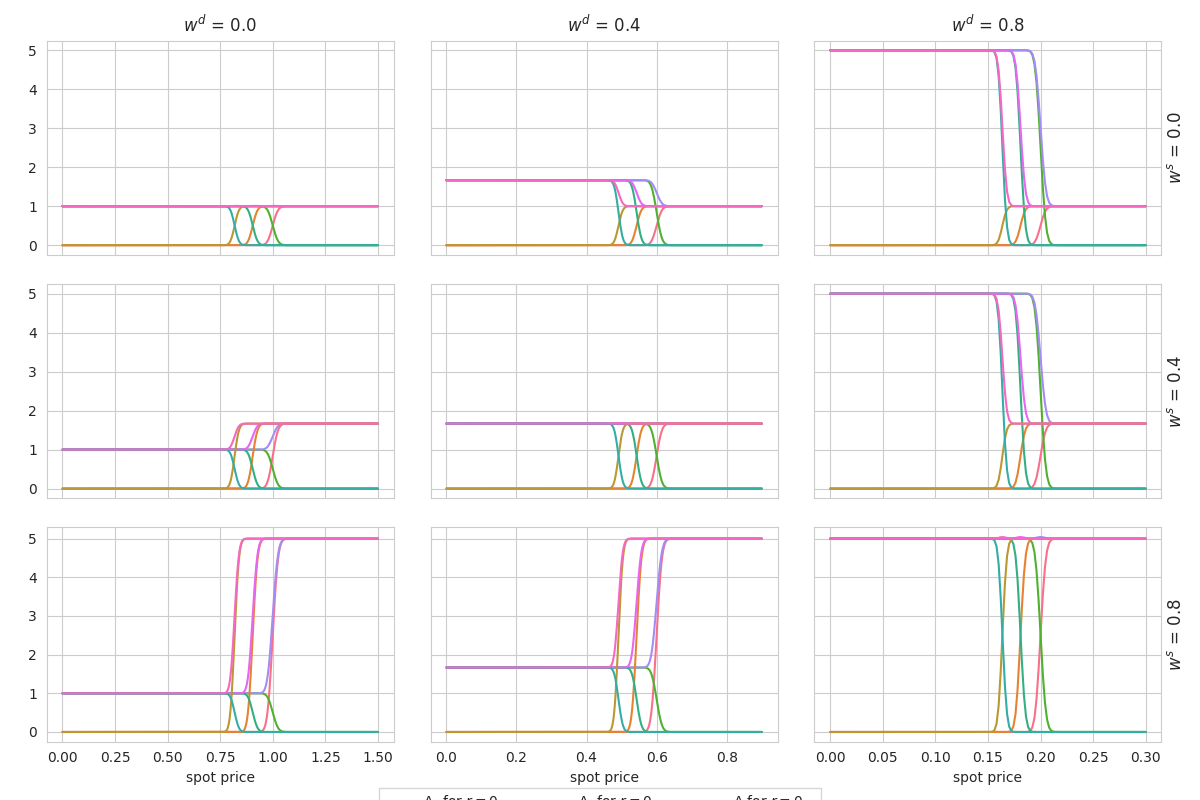

/home/julian/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
/home/julian/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


<IPython.core.display.Javascript object>


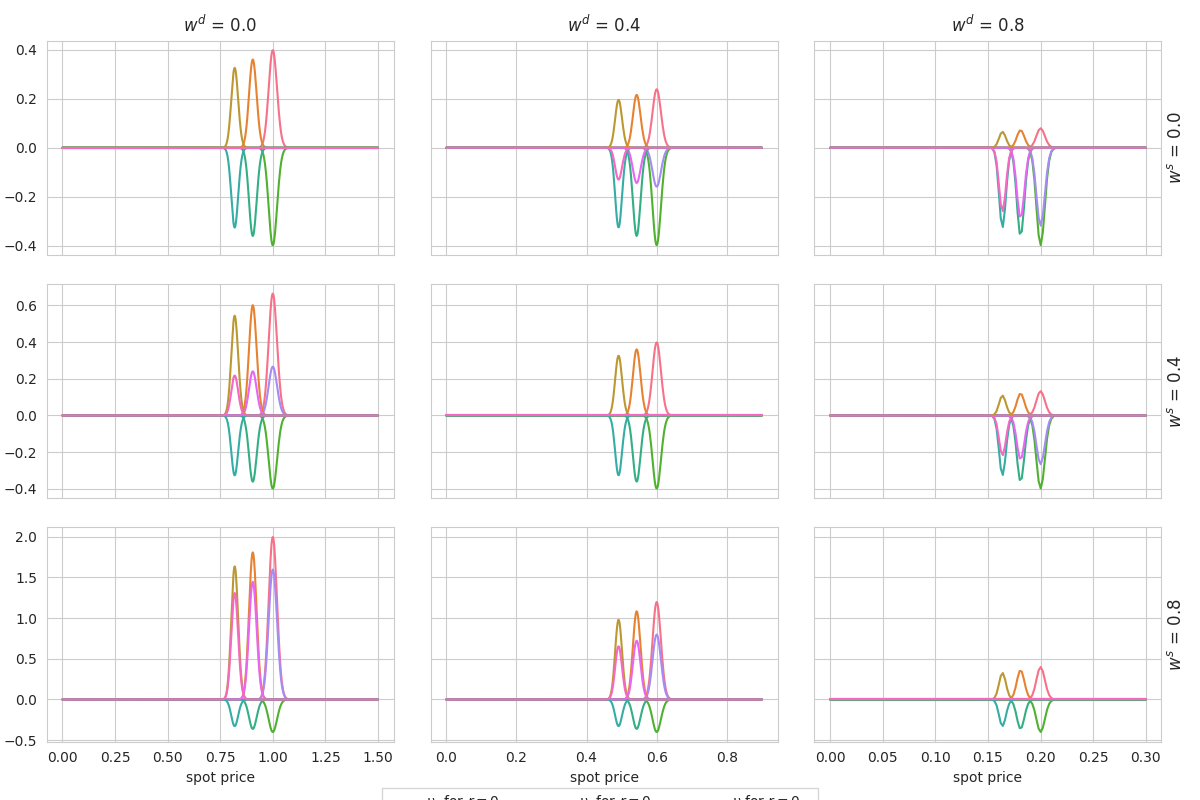

<IPython.core.display.Javascript object>


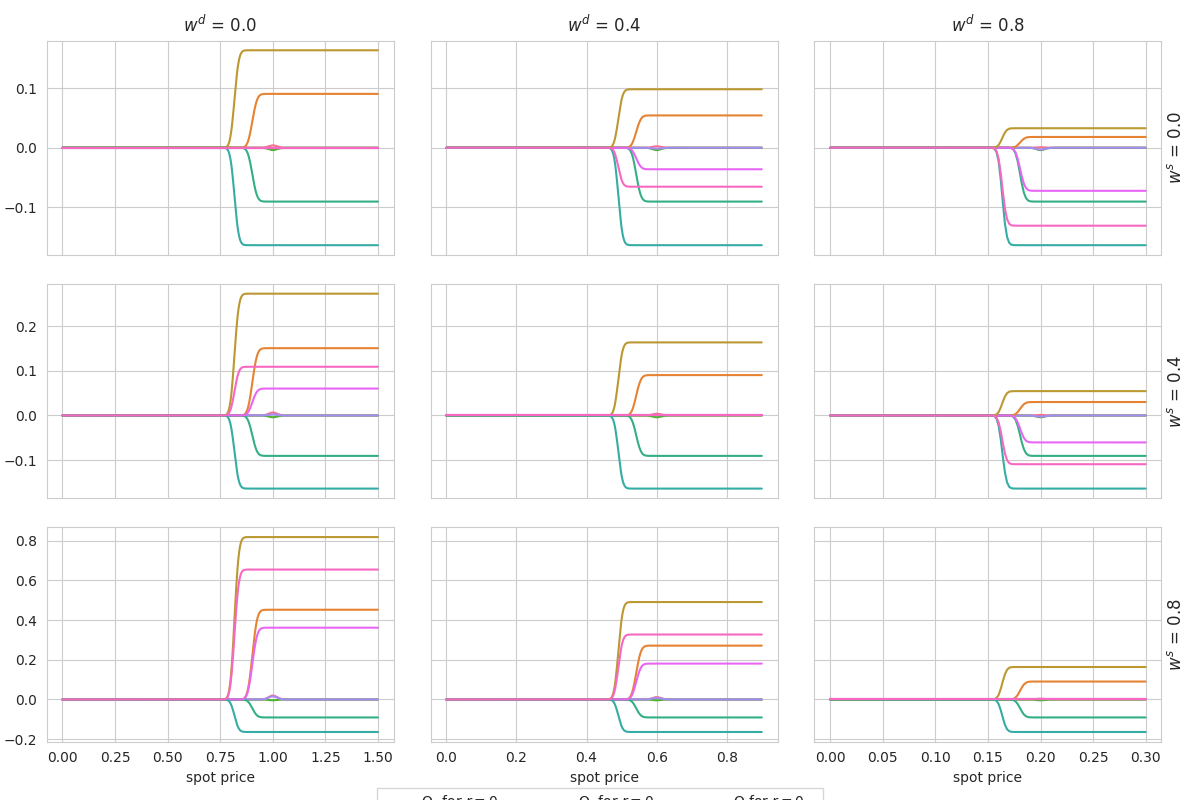

<IPython.core.display.Javascript object>


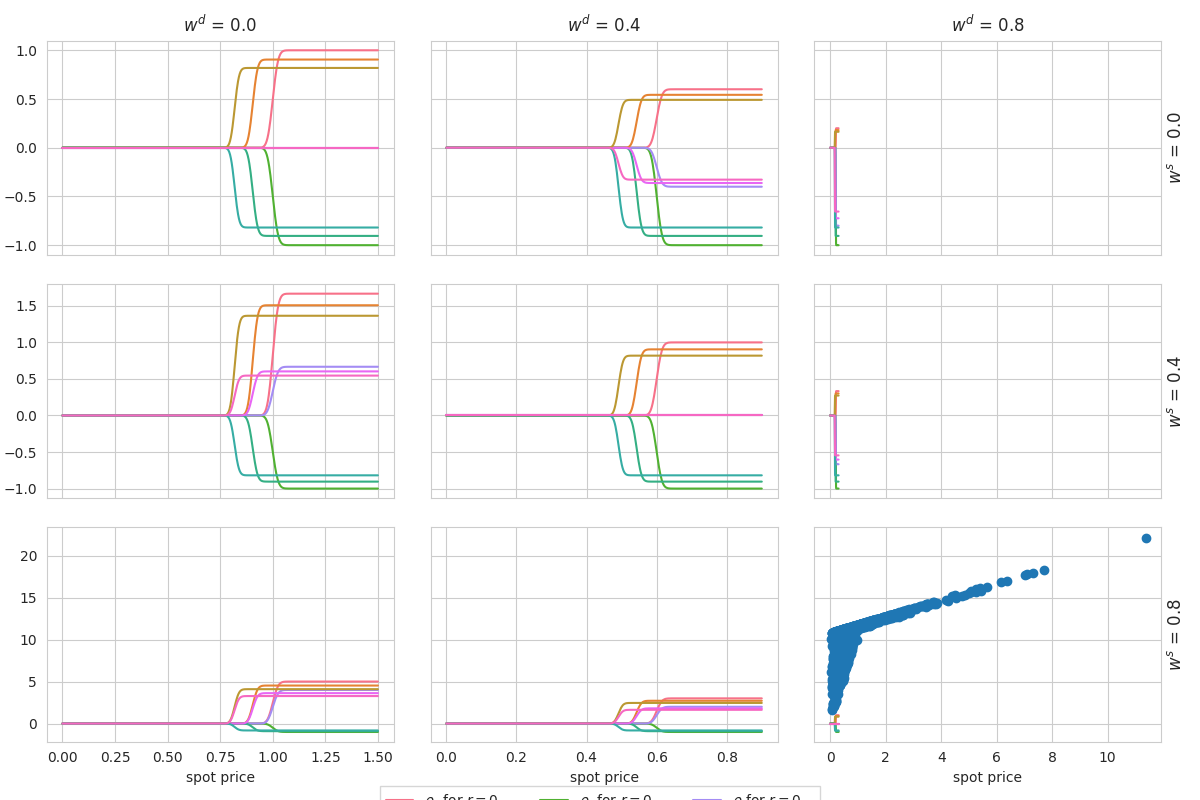

In [145]:
nplots = 3
atl2 = np.linspace(0.,2., 1000)
wdl = np.linspace(0.,0.8, nplots)
wsl = np.linspace(0.,0.8, nplots)
d = 1.0
tau = 1.0
sigma = 0.1
r = 0.2

cols = ['$w^d$ = {0:.1f}'.format(col) for col in wdl]
rows = ['$w^s$ = {0:.1f}'.format(col) for col in wsl]
greek_str = [r'$\Delta_s$',r'$\Delta_r$',r'$\Delta$', 
             r'$\nu_s$' ,  r'$\nu_r$' ,  r'$\nu$' ,
             r'$\Theta_s$',r'$\Theta_r$',r'$\Theta$',
             r'$\rho_s$',  r'$\rho_r$',  r'$\rho$']

var_r = True

for greek in range(4):
    f2, axarr2 = plt.subplots(nplots, nplots, figsize=(12, 8) ,sharex='col', sharey='row')
    for ax, col in zip(axarr2[0], cols):
        ax.set_title(col)
    for ax, col in zip(axarr2[-1], cols):
        ax.set_xlabel('spot price')
    for ax, row in zip(axarr2[:,-1], rows):
        ax.set_ylabel(row, rotation=90, size='large')
        ax.yaxis.set_label_position("right")
        
    f2.tight_layout()
    for i,ws in enumerate(wsl):
        for j,wd in enumerate(wdl):
            atl = np.clip(atl2,0., 1.5*(1.0-wd))
            if var_r:
                gr1 = greeks(atl, ws, wd, d, 0., tau, 0.02)
                gr2 = greeks(atl, ws, wd, d, 0.1, tau, 0.02)
                gr3 = greeks(atl, ws, wd, d, 0.2, tau, 0.02)
            else:
                gr1 = greeks(atl, ws, wd, d, 0., tau, 0.1)
                gr2 = greeks(atl, ws, wd, d, 0., tau, 0.2)
                gr3 = greeks(atl, ws, wd, d, 0., tau, 0.3)
            sline = axarr2[i,j].plot(atl,gr1[0,greek,:], color=colors[0])
            rline = axarr2[i,j].plot(atl,gr1[1,greek,:], color=colors[4])
            vline = axarr2[i,j].plot(atl,gr1[0,greek,:] + gr1[1,greek,:], color=colors[9])
            sline2 = axarr2[i,j].plot(atl,gr2[0,greek,:], color=colors[1])
            rline2 = axarr2[i,j].plot(atl,gr2[1,greek,:], color=colors[5])
            vline2 = axarr2[i,j].plot(atl,gr2[0,greek,:] + gr2[1,greek,:], color=colors[10])
            sline3 = axarr2[i,j].plot(atl,gr3[0,greek,:], color=colors[2])
            rline3 = axarr2[i,j].plot(atl,gr3[1,greek,:], color=colors[6])
            vline3 = axarr2[i,j].plot(atl,gr3[0,greek,:] + gr3[1,greek,:], color=colors[11])
            #axarr[i,j].legend()
            #axarr2[i,j].set_ylim(top=2.5)

    proxy_lines2 = [matplotlib.lines.Line2D([], [], color=p) for p in [colors[0], colors[1], colors[2], colors[4], colors[5], colors[6],
                                                                     colors[9], colors[10], colors[11]]]
    if var_r:
        lgd2 = f2.legend(proxy_lines2, [greek_str[3*greek]+r' for $r = 0$', greek_str[3*greek]+r' for $r = 0.1$',
                                 greek_str[3*greek]+r' for $r = 0.2$',
                                 greek_str[3*greek+1]+r' for $r = 0$', greek_str[3*greek+1]+r' for $r = 0.1$',
                                 greek_str[3*greek+1]+r' for $r = 0.2$',
                                 greek_str[3*greek+2]+r' for $r = 0$', greek_str[3*greek+2]+r' for $r = 0.1$',
                                 greek_str[3*greek+2]+r' for $r = 0.2$'
                                ], loc='lower center', fancybox=False, shadow=False, ncol=3,
             bbox_transform=f2.transFigure, bbox_to_anchor=(0.5,-0.09))
    else:
        lgd2 = f2.legend(proxy_lines2, [greek_str[3*greek]+r' for $\sigma = 0.1$', greek_str[3*greek]+r' for $\sigma = 0.2$',
                                 greek_str[3*greek]+r' for $\sigma = 0.3$',
                                 greek_str[3*greek+1]+r' for $\sigma = 0.1$', greek_str[3*greek+1]+r' for $\sigma = 0.2$',
                                 greek_str[3*greek+1]+r' for $\sigma = 0.3$',
                                 greek_str[3*greek+2]+r' for $\sigma = 0.1$', greek_str[3*greek+2]+r' for $\sigma = 0.2$',
                                 greek_str[3*greek+2]+r' for $\sigma = 0.3$'],
                                 loc='lower center', fancybox=False, shadow=False, ncol=3,
                                    bbox_transform=f2.transFigure, bbox_to_anchor=(0.5,-0.09))
    #f2.legend((sline, rline, vline), ('equity', 'r', 'v = s+r'))
    f2.savefig('greeks_'+str(greek)+'_varr', bbox_extra_artists=(lgd2,), bbox_inches="tight")
    del f2, axarr2, lgd2, proxy_lines2

In [41]:
gr.shape

(2, 4, 200)

In [181]:
xp = np.genfromtxt('xp.csv', delimiter=',')
yp = np.genfromtxt('yp.csv', delimiter=',')
val = np.genfromtxt('val.csv', delimiter=',').astype(int)
select1 = val == 1

<IPython.core.display.Javascript object>


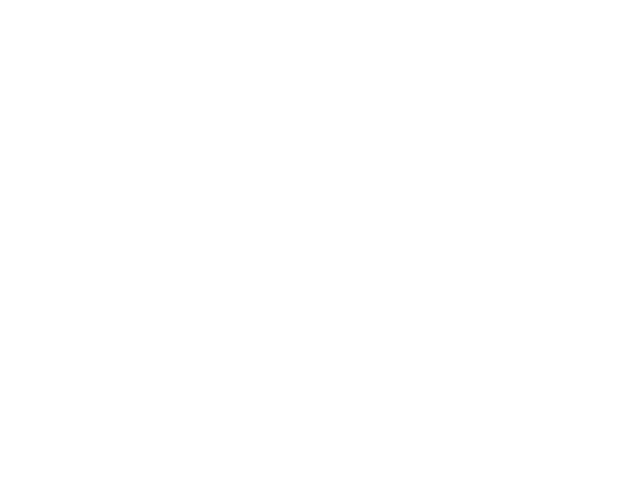

IndexError: boolean index did not match indexed array along dimension 1; dimension is 1000 but corresponding boolean dimension is 500

In [182]:
plt.figure()
plt.scatter(np.log(xp[1,select1]),np.log(yp[1,select1]))